## Importing Necessary Libraries and Packages

In [30]:
from modules.config import ROOT_DIR
import modules.util as ut
import modules.face_recognition as fr
import matplotlib.pyplot as plt
import os

# Training Phase

## Read Image from Training Sets Folder

In [31]:
dirname = os.path.join(ROOT_DIR, "training_sets")
training_set = ut.image_to_matrix(dirname)

## Display Example Image Read from File

Text(0.5, 1.0, 'Example Image')

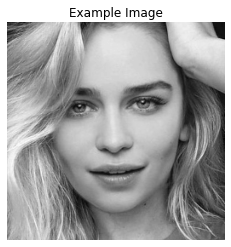

In [40]:
ut.show_image_plt(training_set[:, 51].reshape(256, 256))
plt.title("Example Image")

## the Average Face

Text(0.5, 1.0, 'Average Face')

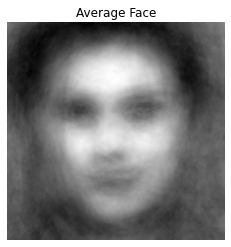

In [41]:
avg = fr.average_face(training_set)
ut.show_image_plt(avg)
plt.title("Average Face")

## Calculating the Eigenfaces

Text(0.5, 1.0, 'Eigenface #6')

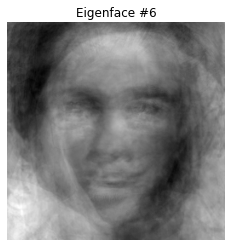

In [42]:
e_face = fr.eigenface(training_set)
ut.show_image_plt(e_face[:, 6].reshape(256, 256))
plt.title("Eigenface #6")

# Test Phase

## Read a Test Image

In [35]:
test_dir = os.path.join(ROOT_DIR, "test_sets")
test_sets = ut.image_to_matrix(test_dir)
test_img = test_sets[:, 4].reshape(len(test_sets[:, 4]), 1)

## Original Image

Text(0.5, 1.0, 'Original image')

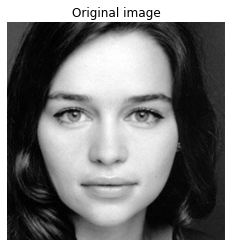

In [36]:
ut.show_image_plt(test_img)
plt.title("Original image")

## Reconstruct Image from Training Set Eigenfaces

Text(0.5, 1.0, 'Reconstruction')

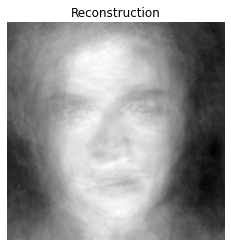

In [39]:
e_face = fr.eigenface(training_set)
diff = test_img - avg

coeff = e_face.T @ diff
reconFace = e_face @ coeff

ut.show_image_plt(reconFace)
plt.title("Reconstruction")